In [1]:
# Standard Import
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# load datasets
train = pd.read_csv("./data/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("./data/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Check data types 
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# EDA (Pre-Clean)
Exploratory Data Analysis (EDA) is used to perform initial analysis on the data

In [5]:
# Descriptive Statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


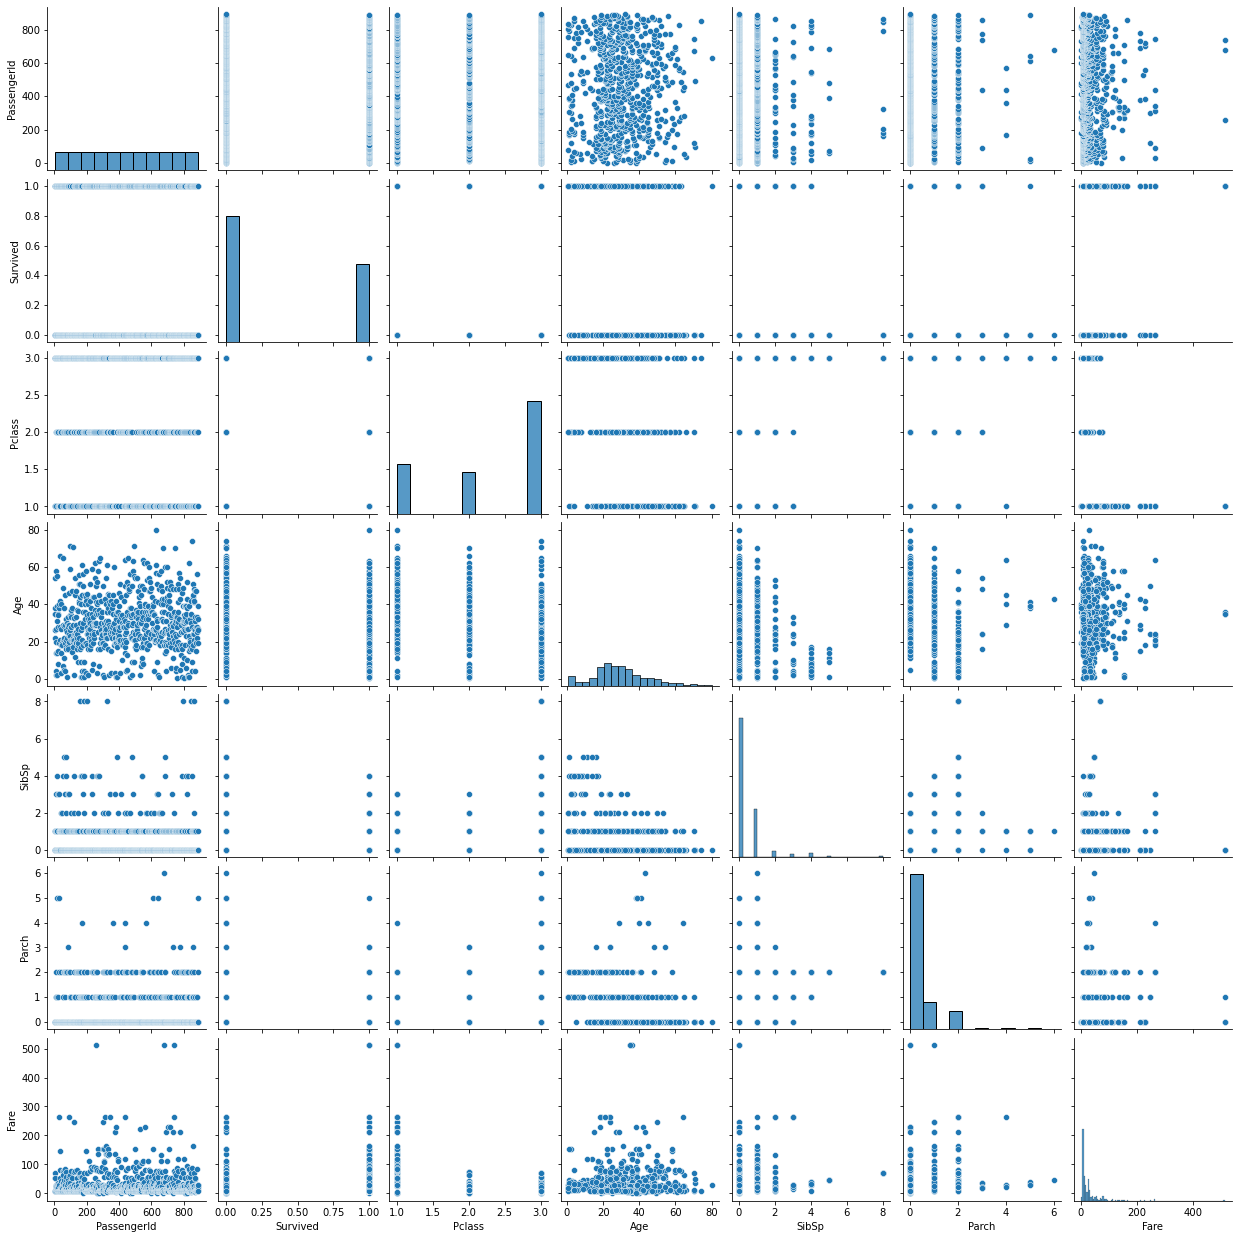

In [6]:
sns.pairplot(train)

In [7]:
print(train.corr())

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


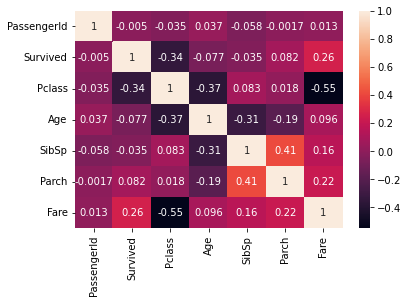

In [8]:
sns.heatmap(train.corr(), annot=True)

# Data Cleaning 
Objectives
- No irrelevant features
- No duplicates
- Split Data

Steps
1. Check for missing data
2. Check for duplicated data
3. Remove irrelevant Features
4. Handle Missing data
5. Convert Data to categorical for analysis

Missing Data
- Features cabin is dropped due to too many missing values
- Feature PassengerID, Name, Ticket and Fare dropped due to irrelevance
- Missing values from feature age are filled with mean values
- Drop rows with missing embarked values

Split Data


In [9]:
train.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# Check for missing values
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Check for duplicated data
train.duplicated().sum()

0

In [13]:
# Drop Features
columns = ['Cabin', 'PassengerId', 'Name', 'Ticket', 'Fare']
train_clean = train.drop(columns, axis=1)
train_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [14]:
# Handle Missing Data
train_clean.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [15]:
# Fill missing Age with mean age 
mean_age = train_clean['Age'].mean()
train_clean['Age'].fillna(mean_age, inplace=True)

In [16]:
train_clean.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [17]:
# Drop missing rows
train_clean.dropna(subset=['Embarked'], how='any', axis=0, inplace=True)

In [18]:
train_clean.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [19]:
# Clean test data
# Check test missing data
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
mean_age = test['Age'].mean()
columns = ['Cabin', 'PassengerId', 'Name', 'Ticket', 'Fare']
test_clean = test.drop(columns, axis=1)
test_clean.head()
test_clean['Age'].fillna(mean_age, inplace=True)
test_clean.dropna(subset=['Embarked'], how='any', axis=0, inplace=True)
test_clean.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [21]:
# Save cleaned data
train_clean.to_excel("./data/train_clean.xlsx")
test_clean.to_excel("./data/test_clean.xlsx")

In [22]:
# Categorical Conversion
# Split data into categories
df_train_cat = pd.concat([train_clean.iloc[:, :3], train_clean.iloc[:, 6]], axis=1)
df_train_cat.head()

,Survived,Pclass,Sex,Embarked
0,0,3,male,S
1,1,1,female,C
2,1,3,female,S
3,1,1,female,S
4,0,3,male,S


In [23]:
# Split Age into age groups
# Categorize age into age groups
bins = [0, 12, 18, 60, 100]
labels = ["Child", "Teens", "Adult", "Elderly"]
df_train_cat["Age"] = pd.cut(train_clean["Age"], bins=bins, labels=labels, right=False)
df_train_cat.head()

,Survived,Pclass,Sex,Embarked,Age
0,0,3,male,S,Adult
1,1,1,female,C,Adult
2,1,3,female,S,Adult
3,1,1,female,S,Adult
4,0,3,male,S,Adult


In [24]:
# Change numeric to categorical 
df_train_cat['Survived'].replace([0, 1], ["Didnt Survive", "Survived"], inplace=True)
df_train_cat['Pclass'].replace([1, 2, 3], ["First", "Second", "Third"], inplace=True)
df_train_cat['Age'] = df_train_cat['Age'].astype(str) 
df_train_cat['Embarked'] = df_train_cat['Embarked'].astype(str)

df_train_cat.head()

,Survived,Pclass,Sex,Embarked,Age
0,Didnt Survive,Third,male,S,Adult
1,Survived,First,female,C,Adult
2,Survived,Third,female,S,Adult
3,Survived,First,female,S,Adult
4,Didnt Survive,Third,male,S,Adult


In [25]:
# group family
df_train_cat['Family'] = train_clean['SibSp'] + train_clean['Parch']
df_train_cat.head()

,Survived,Pclass,Sex,Embarked,Age,Family
0,Didnt Survive,Third,male,S,Adult,1
1,Survived,First,female,C,Adult,1
2,Survived,Third,female,S,Adult,0
3,Survived,First,female,S,Adult,1
4,Didnt Survive,Third,male,S,Adult,0


# EDA (Post-Cleaning)

In [26]:
df_train_cat.shape

(889, 6)

In [27]:
for columns in df_train_cat:
    print(pd.pivot_table(df_train_cat, index='Survived', columns=columns, aggfunc='count'))

                        Age               Embarked                 Family  \
Survived      Didnt Survive Survived Didnt Survive Survived Didnt Survive   
Survived                                                                    
Didnt Survive         549.0      NaN         549.0      NaN         549.0   
Survived                NaN    340.0           NaN    340.0           NaN   

                              Pclass                    Sex           
Survived      Survived Didnt Survive Survived Didnt Survive Survived  
Survived                                                              
Didnt Survive      NaN         549.0      NaN         549.0      NaN  
Survived         340.0           NaN    340.0           NaN    340.0  
                Age              Embarked              Family               \
Pclass        First Second Third    First Second Third  First Second Third   
Survived                                                                     
Didnt Survive    80     9

In [28]:
pd.pivot_table(df_train_cat, index=['Survived', 'Sex'], columns = 'Age', aggfunc='count')

Embarked                     Family                      \
Age                     Adult Child Elderly Teens  Adult Child Elderly Teens   
Survived      Sex                                                              
Didnt Survive female     64.0  13.0     NaN   4.0   64.0  13.0     NaN   4.0   
              male      414.0  16.0    19.0  19.0  414.0  16.0    19.0  19.0   
Survived      female    190.0  19.0     3.0  19.0  190.0  19.0     3.0  19.0   
              male       83.0  20.0     3.0   3.0   83.0  20.0     3.0   3.0   

                     Pclass                      
Age                   Adult Child Elderly Teens  
Survived      Sex                                
Didnt Survive female   64.0  13.0     NaN   4.0  
              male    414.0  16.0    19.0  19.0  
Survived      female  190.0  19.0     3.0  19.0  
              male     83.0  20.0     3.0   3.0

In [29]:
pd.pivot_table(df_train_cat, index=['Survived', 'Pclass'], columns = 'Age', aggfunc='count')

Embarked                     Family                      \
Age                     Adult Child Elderly Teens  Adult Child Elderly Teens   
Survived      Pclass                                                           
Didnt Survive First      67.0   1.0    12.0   NaN   67.0   1.0    12.0   NaN   
              Second     92.0   NaN     3.0   2.0   92.0   NaN     3.0   2.0   
              Third     319.0  28.0     4.0  21.0  319.0  28.0     4.0  21.0   
Survived      First     119.0   3.0     4.0   8.0  119.0   3.0     4.0   8.0   
              Second     65.0  17.0     1.0   4.0   65.0  17.0     1.0   4.0   
              Third      89.0  19.0     1.0  10.0   89.0  19.0     1.0  10.0   

                        Sex                      
Age                   Adult Child Elderly Teens  
Survived      Pclass                             
Didnt Survive First    67.0   1.0    12.0   NaN  
              Second   92.0   NaN     3.0   2.0  
              Third   319.0  28.0     4.0  21.0  
Survived      First   119.0   3.0     4.0   8.0  
              Second   65.0  17.0     1.0   4.0  
              Third    89.0  19.0     1.0  10.0

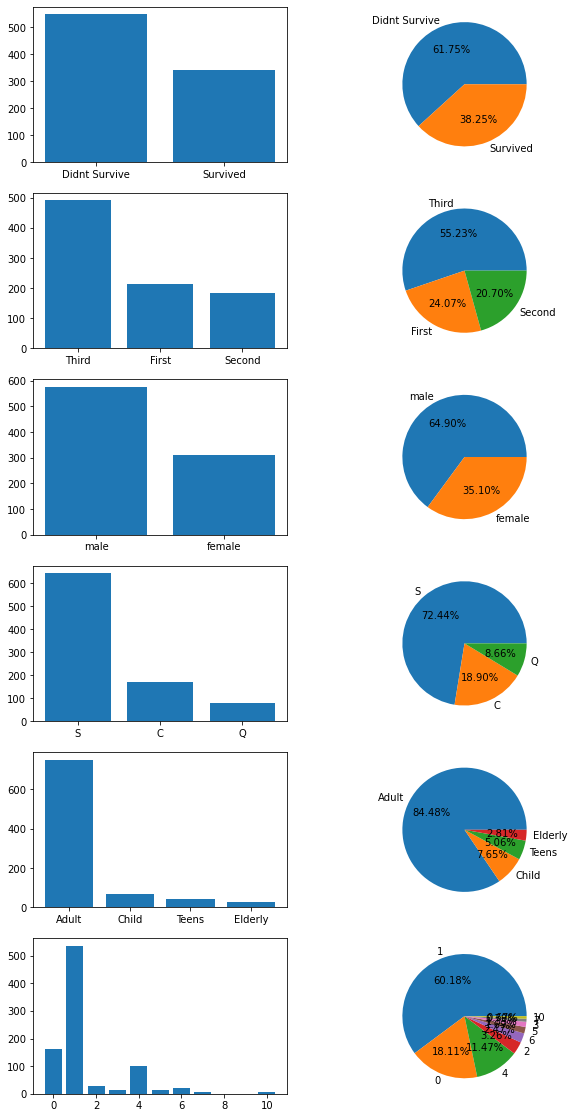

In [30]:
nrows = len(df_train_cat.columns)

fig, axes = plt.subplots(nrows = nrows, ncols = 2, figsize=(10, 20))
r = 0

for column in df_train_cat:
    axes[r, 0].bar(df_train_cat[column].unique(), df_train_cat[column].value_counts())
    axes[r, 1].pie(df_train_cat[column].value_counts(), labels = df_train_cat[column].unique(), autopct='%1.2f%%')
    r = r + 1 

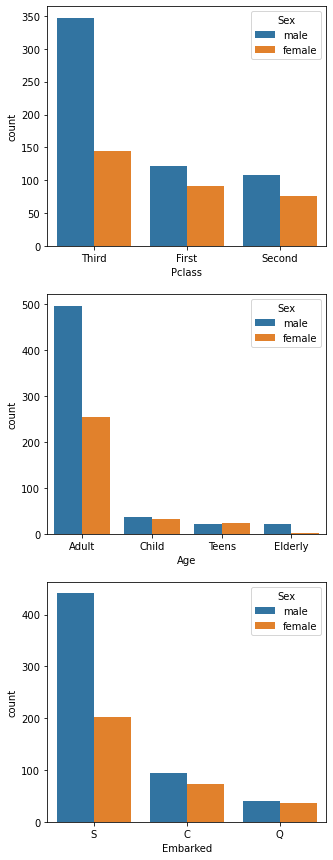

In [31]:
fig, axes = plt.subplots(3, figsize=(5,15))

sns.countplot(data=df_train_cat, x='Pclass', hue='Sex', ax=axes[0])
sns.countplot(data=df_train_cat, x='Age', hue='Sex', ax=axes[1])
sns.countplot(data=df_train_cat, x='Embarked', hue='Sex', ax=axes[2])

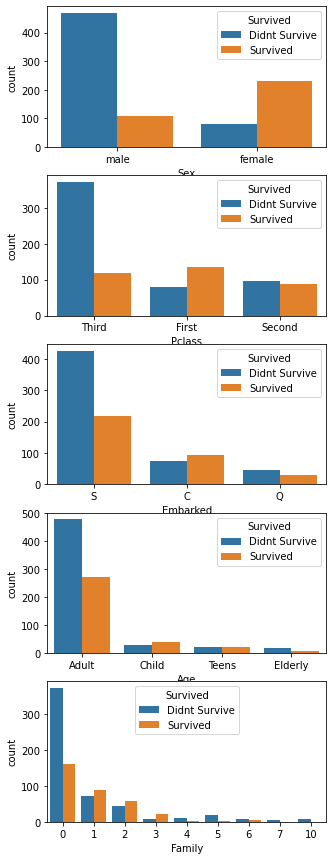

In [32]:
fig, axes = plt.subplots(5, figsize=(5,15))

sns.countplot(data=df_train_cat, x='Sex', hue='Survived', ax=axes[0])
sns.countplot(data=df_train_cat, x='Pclass', hue='Survived', ax=axes[1])
sns.countplot(data=df_train_cat, x='Embarked', hue='Survived', ax=axes[2])
sns.countplot(data=df_train_cat, x='Age', hue='Survived', ax=axes[3])
sns.countplot(data=df_train_cat, x='Family', hue='Survived', ax=axes[4])

In [33]:
# Survival Rates
def get_percentages(a):
    total = len(a)
    count = a.value_counts()
    
    d = dict(count) # Convert to dictionary
    keys = d.keys() # Extract keys
    values = d.values() # Extract Values
    percent = []
    for key in d:
        percent.append(d.get(key)/len(a))
    # zip key value and percentages
    z = zip(keys, values, percent)
    
    print(pd.DataFrame(z, columns=["", "Count", "Percentage"]))
    

In [34]:
get_percentages(df_train_cat["Survived"])

                  Count  Percentage
0  Didnt Survive    549    0.617548
1       Survived    340    0.382452


In [35]:
for columns in df_train_cat:
    print(str(columns))
    get_percentages(df_train_cat[columns])
    print("\n")

Survived
                  Count  Percentage
0  Didnt Survive    549    0.617548
1       Survived    340    0.382452


Pclass
           Count  Percentage
0   Third    491    0.552306
1   First    214    0.240720
2  Second    184    0.206974


Sex
           Count  Percentage
0    male    577    0.649044
1  female    312    0.350956


Embarked
      Count  Percentage
0  S    644    0.724409
1  C    168    0.188976
2  Q     77    0.086614


Age
            Count  Percentage
0    Adult    751    0.844769
1    Child     68    0.076490
2    Teens     45    0.050619
3  Elderly     25    0.028121


Family
       Count  Percentage
0   0    535    0.601800
1   1    161    0.181102
2   2    102    0.114736
3   3     29    0.032621
4   5     22    0.024747
5   4     15    0.016873
6   6     12    0.013498
7  10      7    0.007874
8   7      6    0.006749




In [36]:
# Survival vs Sex
df_train_cat.groupby('Survived')['Sex'].value_counts(normalize=True)

Survived       Sex   
Didnt Survive  male      0.852459
               female    0.147541
Survived       female    0.679412
               male      0.320588
Name: Sex, dtype: float64

In [37]:
# Survival vs Pclass
df_train_cat.groupby('Survived')['Pclass'].value_counts(normalize=True)

Survived       Pclass
Didnt Survive  Third     0.677596
               Second    0.176685
               First     0.145719
Survived       First     0.394118
               Third     0.350000
               Second    0.255882
Name: Pclass, dtype: float64

In [38]:
# Survival vs Age
df_train_cat.groupby('Survived')['Age'].value_counts(normalize=True)

Survived       Age    
Didnt Survive  Adult      0.870674
               Child      0.052823
               Teens      0.041894
               Elderly    0.034608
Survived       Adult      0.802941
               Child      0.114706
               Teens      0.064706
               Elderly    0.017647
Name: Age, dtype: float64

In [39]:
for col in df_train_cat:
    print(str(col))
    print(df_train_cat.groupby('Survived')[col].value_counts(normalize=True))
    print("\n")

Survived
Survived       Survived     
Didnt Survive  Didnt Survive    1.0
Survived       Survived         1.0
Name: Survived, dtype: float64


Pclass
Survived       Pclass
Didnt Survive  Third     0.677596
               Second    0.176685
               First     0.145719
Survived       First     0.394118
               Third     0.350000
               Second    0.255882
Name: Pclass, dtype: float64


Sex
Survived       Sex   
Didnt Survive  male      0.852459
               female    0.147541
Survived       female    0.679412
               male      0.320588
Name: Sex, dtype: float64


Embarked
Survived       Embarked
Didnt Survive  S           0.777778
               C           0.136612
               Q           0.085610
Survived       S           0.638235
               C           0.273529
               Q           0.088235
Name: Embarked, dtype: float64


Age
Survived       Age    
Didnt Survive  Adult      0.870674
               Child      0.052823
               Teens    

Text(0.5, 0, 'Age')

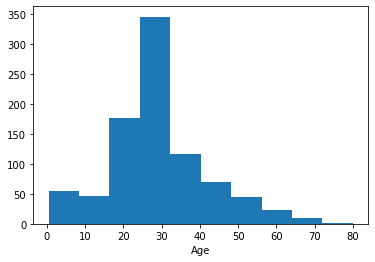

In [40]:
# Age distribution
plt.hist(train_clean['Age'])
plt.xlabel("Age")

# EDA Inference
- There are more deaths than survivors
    - 62% Deaths, 38% Survivors
    - 549 Deaths, 340 Survivors out of population of 889
- Pclass
    - Third class represents 55% of the population
    - First class passengers have the highest chance of survival (63% Survived)
    - Third class passenger have the lowest chance of survival (24% Survived)
- Sex
    - Overall, there are more male passengers than women passengers
    - Women passengers are more likely to survive (74% Survived)
- Embarked
    - Passengers from Southampton are more likely to survive
- Age
    - Children are more likely to survive 
- Family
    - Passengers with 1, 2 and 3 family members are more likely to survive

# Data Preprocessing
Objective
- Split the target from training data
- Encode categorical and ordinal features
- Feature Scaling 
- Split data into training and test set 

Encoding 
- One Hot encoding 
    - Pclass, Sex and Embarked 

In [41]:
train_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [42]:
y = train_clean['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [43]:
X = train_clean.drop('Survived', axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S


In [44]:
# Encode Training Data
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
column_trans = make_column_transformer(
    (OneHotEncoder(), ['Sex', 'Embarked', ]),
    remainder='passthrough'
)
X = column_trans.fit_transform(X)

In [46]:
# Splitting training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 4)

## Machine Learning 
Classification
Models
1. Logistical Regression
2. K-Nearest Neighbors
3. Support Vector Machine
4. Kernal SVM
5. Naive Bayes 
6. Desicion Tree Classifier 
7. Random Forest Classifier 

In [47]:
# 1. Logistical regression 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_preds = logreg.predict(X_test)


In [48]:
cv = cross_val_score(logreg,X_train,y_train,cv=50)
print(cv)
print(cv.mean())

C:\Users\jeffr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jeffr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\jeffr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jeffr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.84615385 0.84615385 0.69230769 0.69230769 0.84615385 0.61538462
 0.69230769 0.84615385 0.92307692 0.76923077 0.76923077 1.
 0.69230769 0.69230769 0.84615385 0.84615385 0.92307692 0.92307692
 0.84615385 0.61538462 0.76923077 0.84615385 0.83333333 0.83333333
 0.83333333 0.41666667 0.91666667 0.83333333 0.75       0.66666667
 0.66666667 0.83333333 0.83333333 0.83333333 0.83333333 0.91666667
 0.66666667 0.66666667 0.75       0.83333333 0.91666667 0.83333333
 0.75       0.75       0.83333333 1.         0.91666667 0.58333333
 0.75       1.        ]
0.7957692307692307


C:\Users\jeffr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jeffr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [49]:
# Evaluation 
from sklearn.metrics import confusion_matrix, accuracy_score
logreg_results = accuracy_score(y_preds, y_test)
logreg_cm = confusion_matrix(y_test, y_preds)
print(logreg_results)
print(logreg_cm)

0.7902621722846442
[[142  22]
 [ 34  69]]


In [50]:
# 2. K-Neareast Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [51]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(knn,X_train,y_train,cv=10)
print(cv)
print(cv.mean())

[0.73015873 0.80952381 0.80645161 0.80645161 0.67741935 0.80645161
 0.80645161 0.77419355 0.82258065 0.85483871]
0.7894521249359958


In [52]:
# Evaluation 
knn_results = accuracy_score(y_preds, y_test)
knn_cm = confusion_matrix(y_test, y_preds)
print(knn_results)
print(knn_cm)

0.7902621722846442
[[142  22]
 [ 34  69]]


In [53]:
# 3. SVM
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [54]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(svc,X_train,y_train,cv=10)
print(cv)
print(cv.mean())

[0.61904762 0.63492063 0.62903226 0.67741935 0.64516129 0.67741935
 0.56451613 0.66129032 0.67741935 0.61290323]
0.6399129544290835


In [55]:
# Evaluation 
svc_results = accuracy_score(y_preds, y_test)
svc_cm = confusion_matrix(y_test, y_preds)
print(svc_results)
print(svc_cm)

0.7902621722846442
[[142  22]
 [ 34  69]]


In [56]:
# 4. Kernal SVM
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [57]:
cv = cross_val_score(gnb,X_train,y_train,cv=10)
print(cv)
print(cv.mean())

[0.71428571 0.79365079 0.80645161 0.83870968 0.83870968 0.72580645
 0.74193548 0.79032258 0.75806452 0.82258065]
0.7830517153097798


In [58]:
# Evaluation 
gnb_results = accuracy_score(y_preds, y_test)
gnb_cm = confusion_matrix(y_test, y_preds)
print(gnb_results)
print(gnb_cm)

0.7902621722846442
[[142  22]
 [ 34  69]]


In [59]:
# Summary
print(logreg_results)
print(knn_results)
print(svc_results)
print(gnb_results)

0.7902621722846442
0.7902621722846442
0.7902621722846442
0.7902621722846442
